12 steps to Navier–Stokes
=====
***

You see where this is going ... we'll do 2D diffusion now and next we will combine steps 6 and 7 to solve Burgers' equation. So make sure your previous steps work well before continuing.

Step 7: 2D Diffusion
----
***

And here is the 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion.  We are going to use the same scheme here, with our forward difference in time and two second-order derivatives. 

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

In [2]:
using Plots

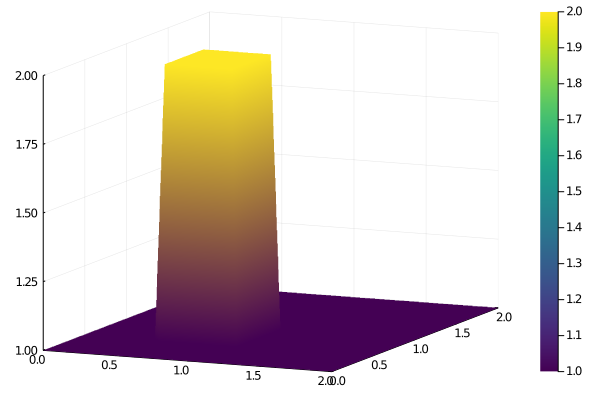

In [3]:
###variable declarations
nx = 31
ny = 31
nt = 17
ν = 0.05
Δx = 2 / (nx - 1)
Δy = 2 / (ny - 1)
σ = .25
Δt = σ * Δx * Δy / ν

x = range(0, stop=2, length=nx)
y = range(0, stop=2, length=ny)

u = ones(ny,nx)

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2

surface(x,y,u,colour=:viridis)

In [4]:
function diffuse(nt)
    u = ones(ny,nx)

    u[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2
    
    uⁿ⁺¹ = u

    for n in 1:nt+1 ##loop across number of time steps
        uⁿ = copy(uⁿ⁺¹)
        
        row, col = size(uⁿ⁺¹)

        for j ∈ 1:row
            for i ∈ 1:col
                # Implement boundary conditions using conditional (if/else) statements
                if j == 1 || j == row || i == 1 || i == col
                    uⁿ⁺¹[j,i] = 1.0
                else
                    uⁿ⁺¹[j,i] = uⁿ[j,i] + 
                                ν*Δt/Δx^2 * (uⁿ[j + 1,i] - 2*uⁿ[j,i] + uⁿ[j - 1,i]) +
                                ν*Δt/Δy^2 * (uⁿ[j,i + 1] - 2*uⁿ[j,i] + uⁿ[j,i - 1])
                end
            end
        end
    end
    surface(x,y,u,colour=:viridis,zlims=((1.0,2.0)))
end

diffuse (generic function with 1 method)

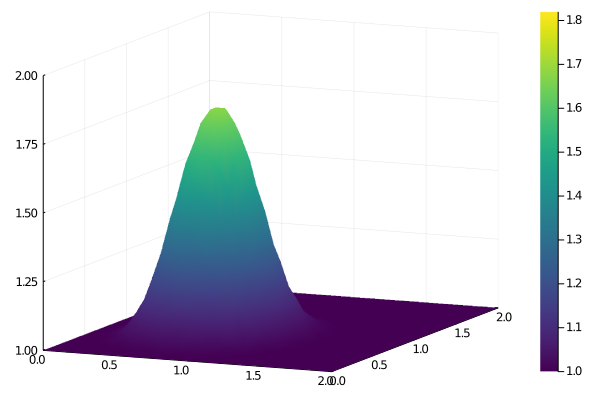

In [5]:
diffuse(10)

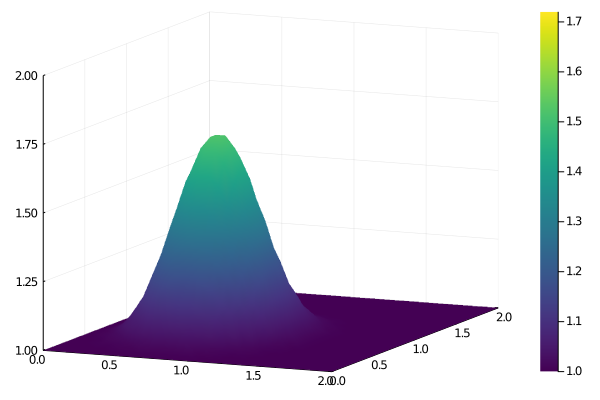

In [6]:
diffuse(14)

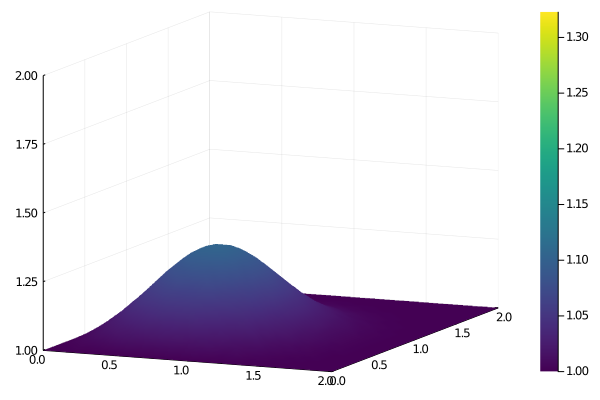

In [7]:
diffuse(50)

## Learn More

The video lesson that walks you through the details for Steps 5 to 8 is **Video Lesson [6](https://youtube.com/watch?v=tUg_dE3NXoY)** on You Tube: